# Hyper-parameter optimization analysis

In [1]:
import os
import glob
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 14.0

## Specify the results to load

In [4]:
ls /global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results

alt-cosmoflow-2020-03-05/   cosmoflow-v2-hpo-478268-0/
cosmoflow-2020-03-05/       cosmoflow-v2-hpo-478269-0/
cosmoflow-2020-03-08/       cosmoflow-v2-hpo-478270-0/
cosmoflow-resnet/           cosmoflow-v2-hpo-478271-0/
cosmoflow-resnet-000/       cosmoflow-v2-hpo-478272-0/
cosmoflow-v2-2020-02-27/    cosmoflow-v2-hpo-478273-0/
cosmoflow-v2-hpo-472461-0/  cosmoflow-v2-hpo-478274-0/
cosmoflow-v2-hpo-472461-1/  cosmoflow-v2-hpo-478275-0/
cosmoflow-v2-hpo-472461-2/  cosmoflow-v2-hpo-478276-0/
cosmoflow-v2-hpo-472461-3/  cosmoflow-v2-hpo-478277-0/
cosmoflow-v2-hpo-474221-0/  cosmoflow-v2-hpo-478278-0/
cosmoflow-v2-hpo-474221-1/  cosmoflow-v2-hpo-478279-0/
cosmoflow-v2-hpo-474221-3/  cosmoflow-v2-hpo-478280-0/
cosmoflow-v2-hpo-474221-4/  cosmoflow-v2-hpo-478281-0/
cosmoflow-v2-hpo-474221-5/  cosmoflow-v2-hpo-478282-0/
cosmoflow-v2-hpo-476773-0/  cosmoflow-v2-hpo-478283-0/
cosmoflow-v2-hpo-476773-1/  cosmoflow-v2-hpo-478284-0/
cosmoflow-v2-hpo-476773-2/  cosmoflow-v2-hpo-478285-0/
cosmoflow-

In [5]:
result_dirs = sorted(glob.glob('/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-*'))

In [6]:
result_dirs

['/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-472461-0',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-472461-1',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-472461-2',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-472461-3',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-474221-0',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-474221-1',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-474221-3',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-474221-4',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-474221-5',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-476773-0',
 '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-476773-1',
 '/global/cscratch1/sd/sfarrell/

## Load the results

In [7]:
def load_result(path):
    # Load the config
    with open(os.path.join(path, 'config.pkl'), 'rb') as f:
        config = pickle.load(f)
    # Load the history
    try:
        history = pd.read_csv(os.path.join(path, 'history.csv'))
    except Exception:
        history = None
    return config, history

In [8]:
results = [load_result(p) for p in result_dirs]
results = [r for r in results if r[1] is not None]

In [9]:
print('Found %i non-empty results' % len(results))

Found 41 non-empty results


## Plot and compare

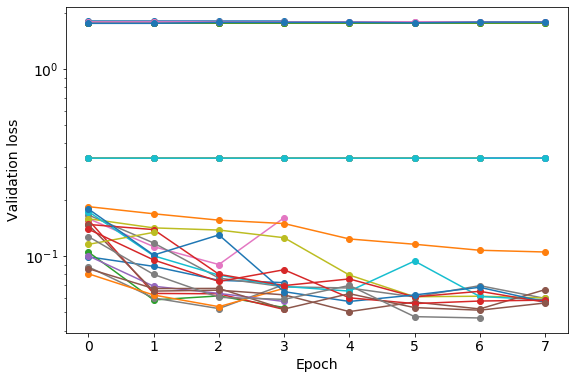

In [10]:
plt.figure(figsize=(9, 6))

for config, history in results:
    if history is not None:
        plt.plot(history.epoch, history.val_loss, 'o-')

plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Validation loss');

In [11]:
def make_summary(config, history):
    best = history.val_loss.idxmin()
    return dict(
        #path=config['output_dir'],
        n_ranks=config['n_ranks'],
        batch_size=config['data']['batch_size'],
        log=config['data']['apply_log'],
        conv_size=config['model']['conv_size'],
        fc1_size=config['model']['fc1_size'],
        fc2_size=config['model']['fc2_size'],
        act=config['model']['hidden_activation'],
        dropout=config['model']['dropout'],
        optimizer=config['optimizer']['name'],
        lr=config['optimizer']['lr'],
        train_loss=history.loss[best],
        val_loss=history.val_loss[best],
        val_mae=history.val_mean_absolute_error[best],
        last_epoch=history.epoch.max(),
        best_epoch=history.epoch[best],
    )

In [12]:
# Make a summary table
summaries = pd.DataFrame([make_summary(*r) for r in results])
#summaries

In [13]:
summaries.sort_values('val_loss')

,n_ranks,batch_size,log,conv_size,fc1_size,fc2_size,act,dropout,optimizer,lr,train_loss,val_loss,val_mae,last_epoch,best_epoch
37,16,4,True,32,64,16,LeakyReLU,0.232769,Nadam,0.00005,0.068887,0.046669,0.158907,6,6
25,16,4,True,32,128,64,LeakyReLU,0.550572,Adam,0.00050,0.068734,0.050466,0.164359,7,4
35,16,4,True,64,16,128,LeakyReLU,0.418084,Adam,0.00010,0.072952,0.051368,0.170732,7,6
3,8,4,True,64,256,128,ReLU,0.338283,Nadam,0.00005,0.067954,0.051828,0.167297,3,3
7,8,4,True,32,32,32,LeakyReLU,0.299956,Nadam,0.00005,0.085019,0.052391,0.174548,3,2
2,8,4,True,16,128,64,LeakyReLU,0.200000,Adam,0.00010,0.059081,0.053051,0.173907,3,3
11,8,4,True,16,128,64,LeakyReLU,0.200000,Adam,0.00010,0.067286,0.053631,0.171984,3,2
33,16,4,True,8,512,128,LeakyReLU,0.575119,Nadam,0.00010,0.071439,0.055716,0.177113,7,5
23,16,4,True,16,256,512,ReLU,0.063362,Adam,0.00005,0.058473,0.056710,0.179887,7,7
30,16,4,True,8,512,32,LeakyReLU,0.577689,Nadam,0.00050,0.076019,0.056917,0.177565,7,7


In [14]:
best = summaries.val_loss.idxmin()

In [15]:
best_config, best_history = results[best]

In [16]:
best_config

{'output_dir': '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/results/cosmoflow-v2-hpo-478283-0',
 'data': {'name': 'cosmo',
  'data_dir': '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/data/cosmoUniverse_2019_05_4parE_tf',
  'n_train': 131072,
  'n_valid': 16384,
  'shard_type': 'global',
  'sample_shape': [128, 128, 128, 4],
  'batch_size': 4,
  'n_epochs': 8,
  'apply_log': True,
  'prefetch': 8},
 'model': {'name': 'cosmoflow',
  'input_shape': [128, 128, 128, 4],
  'target_size': 4,
  'conv_size': 32,
  'fc1_size': 64,
  'fc2_size': 16,
  'hidden_activation': 'LeakyReLU',
  'pooling_type': 'MaxPool3D',
  'dropout': 0.23276908845014693},
 'optimizer': {'name': 'Nadam', 'lr': 5e-05, 'lr_scaling': 'none'},
 'train': {'loss': 'mse',
  'metrics': ['mae'],
  'lr_schedule': {16: 0.3, 32: 0.333},
  'early_stopping_patience': 4},
 'n_ranks': 16}

In [17]:
best_history

,epoch,loss,lr,mean_absolute_error,time,val_loss,val_mean_absolute_error
0,0,0.196007,0.00005,0.357037,2354.166493,0.127010,0.282883
1,1,0.132809,0.00005,0.288780,2371.702984,0.079781,0.221697
2,2,0.100326,0.00005,0.249693,2299.594712,0.060157,0.187128
3,3,0.086791,0.00005,0.230644,2248.762815,0.058679,0.183635
4,4,0.079161,0.00005,0.219289,2229.655263,0.069653,0.198570
5,5,0.073466,0.00005,0.210758,2283.782750,0.047441,0.161505
6,6,0.068887,0.00005,0.203796,2239.760854,0.046669,0.158907


### Plot training and validation loss curves separately for top models

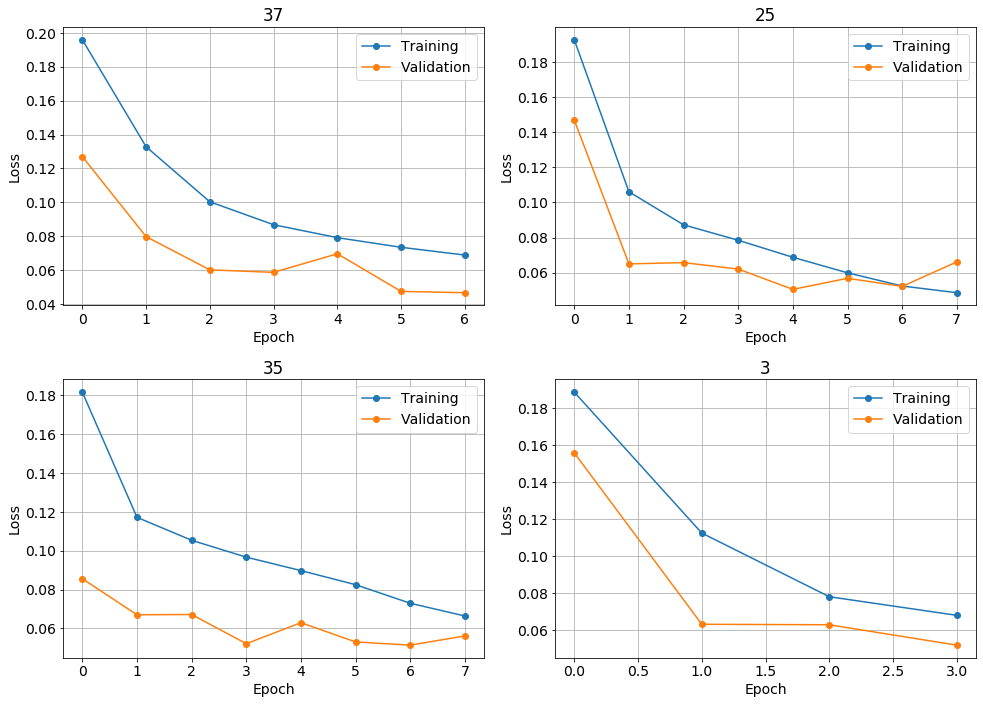

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, ax in zip(summaries.sort_values('val_loss').index, axs.flatten()):
    
    history = results[i][1]
    ax.set_title(i)
    
    ax.plot(history.epoch, history.loss, 'o-', label='Training')
    ax.plot(history.epoch, history.val_loss, 'o-', label='Validation')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend(loc=0)
    ax.grid()

plt.tight_layout()

## Runtime statistics

In [19]:
epoch_times = pd.concat([r[1].time for r in results])

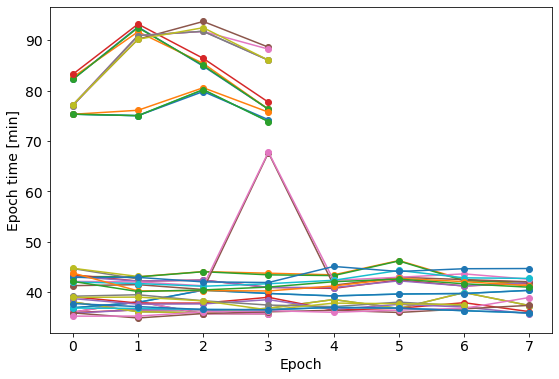

In [20]:
plt.figure(figsize=(9,6))

for r in results:
    history = r[1]
    
    plt.plot(history.epoch, history.time/60, 'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Epoch time [min]')

## Additional analysis

In [21]:
summaries[(summaries.optimizer == 'Adam') & (summaries.last_epoch > 3)].sort_values('val_loss')

,n_ranks,batch_size,log,conv_size,fc1_size,fc2_size,act,dropout,optimizer,lr,train_loss,val_loss,val_mae,last_epoch,best_epoch
25,16,4,True,32,128,64,LeakyReLU,0.550572,Adam,0.00050,0.068734,0.050466,0.164359,7,4
35,16,4,True,64,16,128,LeakyReLU,0.418084,Adam,0.00010,0.072952,0.051368,0.170732,7,6
23,16,4,True,16,256,512,ReLU,0.063362,Adam,0.00005,0.058473,0.056710,0.179887,7,7
17,16,4,True,16,16,64,LeakyReLU,0.474450,Adam,0.00010,0.106277,0.059404,0.183275,7,7
21,16,4,True,16,128,16,ReLU,0.320578,Adam,0.00005,0.152251,0.105130,0.258391,7,7
26,16,4,False,32,512,16,ReLU,0.114949,Adam,0.00010,0.327999,0.333495,0.501155,7,5
20,16,4,True,8,512,32,ReLU,0.359467,Adam,0.00500,0.328196,0.333545,0.501039,7,3
31,16,4,False,32,512,512,LeakyReLU,0.443771,Adam,0.00010,1.780132,1.762838,1.195569,7,1
32,16,4,False,32,16,64,LeakyReLU,0.524501,Adam,0.00100,1.771718,1.770214,1.198643,7,0
36,16,4,True,32,128,64,LeakyReLU,0.174150,Adam,0.00500,1.742656,1.773731,1.200109,7,0
